# Face Mask Detetion

### import necessary libraries

In [91]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow import keras
from skimage.transform import resize
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.utils import shuffle

In [93]:
pwd

'C:\\Users\\USER\\Documents\\Edure\\Deep Learning\\Capstone Project\\Deep learning Capstone projects\\Face Mask'

### Fetch the Data

In [96]:
import glob

In [98]:

with_mask = glob.glob("with_mask 1/with_mask 1/*.jpg")
without_mask = glob.glob("without_mask/without_mask/*.jpg")


In [100]:
with_mask,without_mask

(['with_mask 1/with_mask 1\\325.jpg',
  'with_mask 1/with_mask 1\\326.jpg',
  'with_mask 1/with_mask 1\\327.jpg',
  'with_mask 1/with_mask 1\\328.jpg',
  'with_mask 1/with_mask 1\\329.jpg',
  'with_mask 1/with_mask 1\\330.jpg',
  'with_mask 1/with_mask 1\\331.jpg',
  'with_mask 1/with_mask 1\\332.jpg',
  'with_mask 1/with_mask 1\\333.jpg',
  'with_mask 1/with_mask 1\\334.jpg',
  'with_mask 1/with_mask 1\\335.jpg',
  'with_mask 1/with_mask 1\\336.jpg',
  'with_mask 1/with_mask 1\\337.jpg',
  'with_mask 1/with_mask 1\\338.jpg',
  'with_mask 1/with_mask 1\\339.jpg',
  'with_mask 1/with_mask 1\\340.jpg',
  'with_mask 1/with_mask 1\\341.jpg',
  'with_mask 1/with_mask 1\\342.jpg',
  'with_mask 1/with_mask 1\\343.jpg',
  'with_mask 1/with_mask 1\\344.jpg',
  'with_mask 1/with_mask 1\\345.jpg',
  'with_mask 1/with_mask 1\\346.jpg',
  'with_mask 1/with_mask 1\\347.jpg',
  'with_mask 1/with_mask 1\\348.jpg',
  'with_mask 1/with_mask 1\\349.jpg',
  'with_mask 1/with_mask 1\\350.jpg',
  'with_mask

### find the no.of images

In [103]:
print(f'Number of images with_mask:{len(with_mask)}')
print(f'Number of images without_mask:{len(without_mask)}')

Number of images with_mask:609
Number of images without_mask:676


### Store all the images inside a list and create a list with the corresponding labels

In [106]:
image = []
label = []
for i in with_mask:
    img = plt.imread(i)
    image.append(img)
    label.append(0)

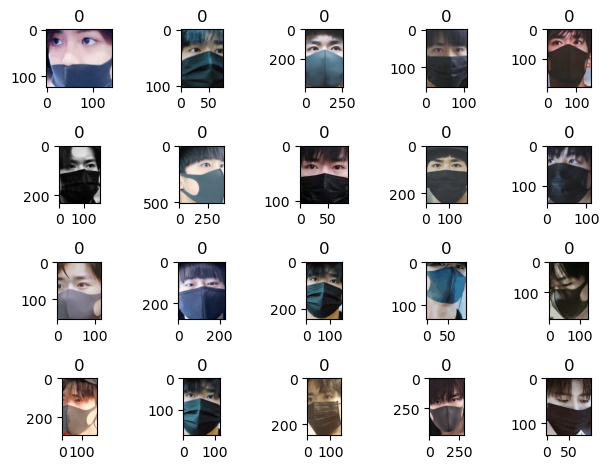

In [107]:
for i in range (20):
    plt.subplot(4,5,i+1)
    plt.imshow(image[i])
    plt.title(label[i])

plt.tight_layout()

In [116]:
for i in without_mask:
    img = plt.imread(i)
    image.append(img)
    label.append(1)

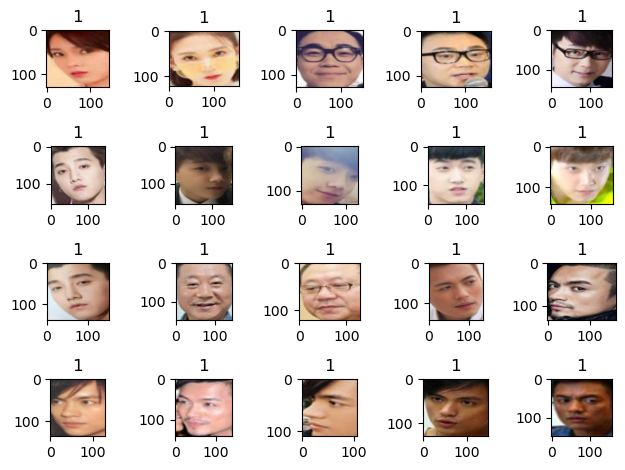

In [132]:
n = 1
for i in range (610,630):
    plt.subplot(4,5,n)
    plt.imshow(image[i])
    plt.title(label[i])
    n+=1

plt.tight_layout()

In [15]:
label

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


### Shuffle both image list and label list

In [18]:
#training_set
image,label = shuffle(image,label,random_state=100)

In [19]:
len(image)

1285

### Plot a few images from our shuffled list with its corresponding label

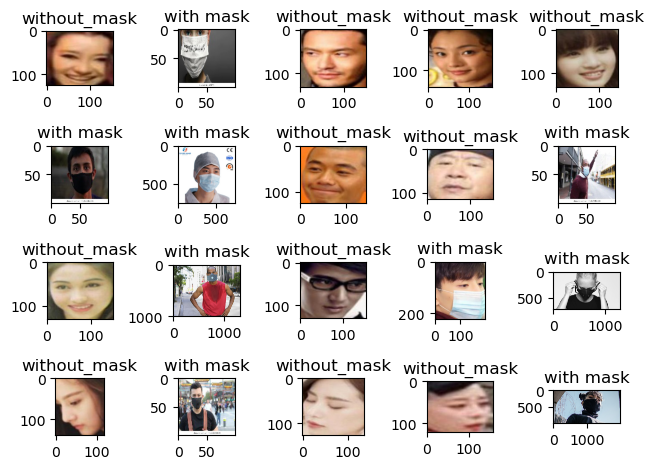

In [21]:
#Plot this
for i in range (20):
    plt.subplot(4,5,i+1)
    plt.imshow(image[i])
    if label[i]==0:
        plt.title('with mask')
    else:
        plt.title('without_mask')
plt.tight_layout()

In [82]:
for i in range(10):
    print(image[i].shape)

(126, 154, 3)
(100, 100, 3)
(131, 151, 3)
(141, 157, 3)
(131, 143, 3)
(100, 100, 3)
(750, 750, 3)
(125, 144, 3)
(116, 153, 3)
(100, 100, 3)


### reshape the image

In [24]:
X = []
for n,i in enumerate(image):
    X.append(resize(i,(64,64,3)))
    print(n)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [25]:
# make it in array format
X = np.array(X)
y = np.array(label)

In [26]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=42, test_size=0.1)

#### Plot some of our reshaped images

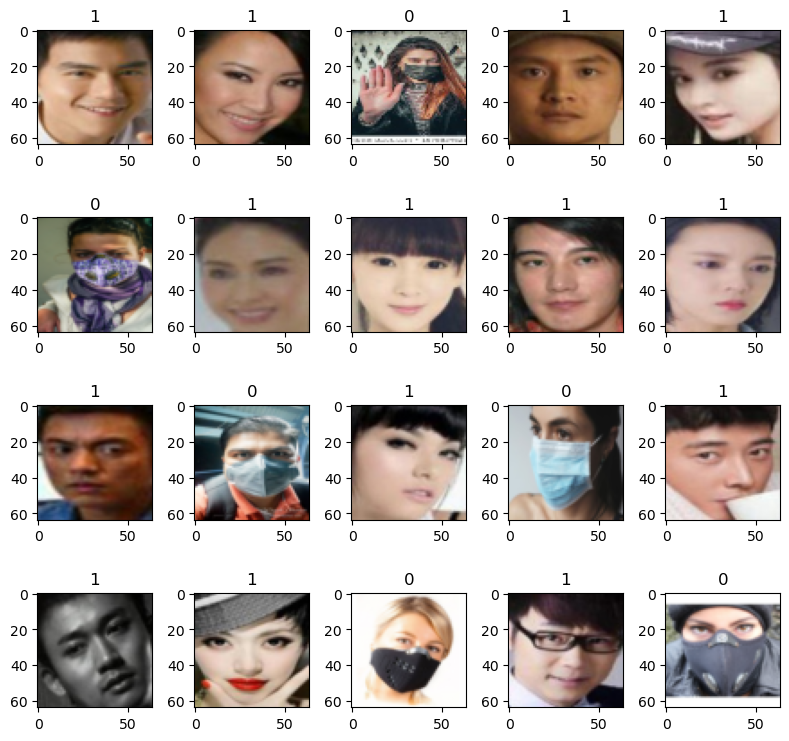

In [28]:
plt.figure(figsize=(8,8))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(xtrain[i])
    plt.title(ytrain[i])
    plt.tight_layout()

### check the shape of xtrain,ytrain,ytrain and ytest

In [30]:
print(f'Shape of Xtrain is:',xtrain.shape)
print(f'Shape of Xtest is:', xtest.shape)
print(f'Shape of ytrain is:',ytrain.shape)
print(f'Shape of ytest is:',ytest.shape)

Shape of Xtrain is: (1156, 64, 64, 3)
Shape of Xtest is: (129, 64, 64, 3)
Shape of ytrain is: (1156,)
Shape of ytest is: (129,)


#### Create a keras Sequential model with convolution layers, Flatten and Hidden layers

In [32]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16,(3, 3), activation = 'relu', input_shape = (64,64,3)),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Conv2D(32,(3, 3), activation = 'relu'),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile the model

In [34]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### take summary of the model

In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         401,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 406,625 (1.55 MB)

 Trainable params: 406,625 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.fit(xtrain,ytrain,epochs=10,validation_split=0.2)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.7231 - loss: 0.5371 - val_accuracy: 0.9655 - val_loss: 0.0890
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9773 - loss: 0.0810 - val_accuracy: 0.9440 - val_loss: 0.1494
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9672 - loss: 0.0831 - val_accuracy: 0.9871 - val_loss: 0.0422
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9927 - loss: 0.0326 - val_accuracy: 0.9914 - val_loss: 0.0457
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9925 - loss: 0.0350 - val_accuracy: 0.9828 - val_loss: 0.0723
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9864 - loss: 0.0371 - val_accuracy: 0.9914 - val_loss: 0.0360
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9939 - loss: 0.0246 - val_accuracy: 0.9914 - val_loss: 0.0353
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9977 - loss: 0.0125 - val_accuracy: 0.9914 - v

### evaluate the model

In [39]:
model.evaluate(xtrain,ytrain)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9934 - loss: 0.0209


[0.03693166747689247, 0.987889289855957]

### predict the model

In [41]:
ypred = model.predict(xtest)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [42]:
ypred[0]

array([0.9998537], dtype=float32)

### if it is array, make it binary

In [44]:
pred = []
for i in ypred:
    if i > 0.5:
        pred.append(1)
    else:
        pred.append(0)

In [45]:
pred

[1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0]

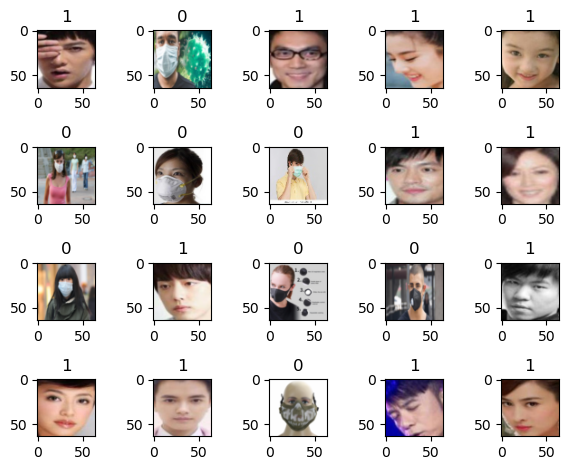

In [46]:
# plot this
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(xtest[i])
    plt.title(pred[i])
    plt.tight_layout()

### make visualization

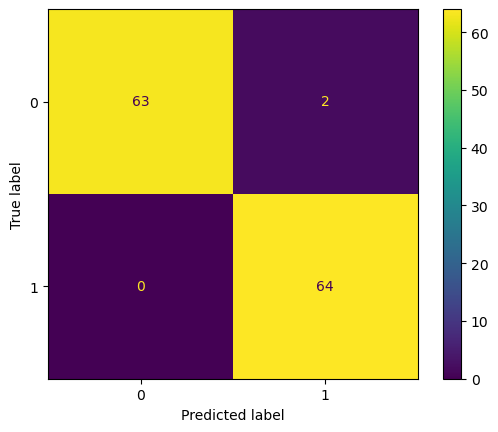

In [48]:
ConfusionMatrixDisplay.from_predictions(ytest, pred)